<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h3 align="center">Instructor: Dr. Pilaram</h3>
<h4 align="center">Sharif University of Technology, Spring 2025</h4>
<h4 align="center">Computer Assignment 1</h4>

For any furhter questions, feel free to contact Romina Babaei (@rominababaei)


Before starting, make sure to write your name and student number!


In [ ]:
Name = "Mohammad Mobin Jelodar"
Student_Number = "402101493"

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu

# Problem 1

## 1-1 Gaussian Elimination  ``(20 pt.)``

Gaussian elimination is a fundamental algorithm for solving systems of linear equations, finding matrix inverses, and computing determinants. It works by transforming a given system of linear equations into an upper triangular form using row operations.

This method converts a matrix into row echelon form using the following steps:

1. **Partial Pivoting**: If necessary, swap rows to bring the largest (in absolute value) element to the pivot position.
2. **Row Elimination**: Apply row operations to eliminate all entries below the pivot by subtracting appropriate multiples of the pivot row from the rows beneath it.

---

Implement a Python function ``gaussian_elimination(matrix)`` that executes Gaussian elimination on a given square matrix.

- The function should return the upper triangular form of the matrix and number of row swaps as a tuple.
- You are **not allowed** to use any built-in library functions for matrix operations; the method should be implemented from scratch.


---

### Example

**Input:**

$$
\begin{bmatrix}
-1 & 2 & 1 \\
-4 & 0 & -3 \\
-4 & 0 & -2
\end{bmatrix}
$$

**Output:**

$$
\begin{bmatrix}
-4 & 0 & -3 \\
 0 & 2 & 1.75 \\
 0 & 0 & 1
\end{bmatrix}
$$

In [ ]:
def gaussian_elimination(A):
    n = len(A)
    num_swaps = 0
    matrix = A.astype(float)

    for i in range(n):
        # Partial Pivoting: Find the row with the largest pivot element
        max_row = i + np.argmax(abs(matrix[i:, i]))
        if max_row != i:
            matrix[[i, max_row]] = matrix[[max_row, i]]  # Swap rows
            num_swaps += 1

        # Row Elimination: Make all elements below pivot zero
        for j in range(i + 1, n):
            if matrix[j, i] != 0:
                factor = matrix[j, i] / matrix[i, i]
                matrix[j, i:] -= factor * matrix[i, i:]
                matrix[j, i] = 0  # Explicitly set to zero for numerical stability
    return matrix, num_swaps

In [ ]:
# Evaluation Cell
# Do not change anything here

myprint=True # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, n))
    pl, expected_A_ref = lu(A, permute_l=True)
    result_ref = gaussian_elimination(A.astype(float))[0]
    if(myprint):
        print(f"Test Case {i + 1}:")
        print(A)
        print("User Output :")
        print(result_ref)
        print("Expected Output :")
        print(expected_A_ref)
    assert np.allclose(result_ref, expected_A_ref), "Test Case Failed: The result does not match the expected REF."

print("All test cases passed!")


Streaming output truncated to the last 5000 lines.
  -14.06569343   3.95620438   7.2919708 ]
 [  0.           0.           0.         -12.14511041  -4.18611987
   -8.89905363   1.09148265  -4.87381703]
 [  0.           0.           0.           0.          -9.76320346
   -0.14242424  -5.88138528   1.01948052]
 [  0.           0.           0.           0.           0.
   -9.46127788   3.44887155  -0.79358844]
 [  0.           0.           0.           0.           0.
    0.           8.15576703   0.38456145]
 [  0.           0.           0.           0.           0.
    0.           0.          -0.43050644]]
Test Case 241:
[[  5  -5  -1   2  -4   8]
 [  8   6   2   2  -9  -1]
 [  2  -2 -10   3   5   9]
 [  4 -10   6   2   4   5]
 [  5  -9   6   0  -3   9]
 [ -8   1   9   5   3   5]]
User Output :
[[8.0, 6.0, 2.0, 2.0, -9.0, -1.0], [0.0, -13.0, 5.0, 1.0, 8.5, 5.5], [0.0, 0.0, 13.692307692307692, 7.538461538461538, -1.4230769230769234, 6.961538461538462], [0.0, 0.0, 0.0, 8.752808988764045

## 1-2 Gauss-Jordan Elimination
Gauss-Jordan elimination is an extension of Gaussian elimination, where we transform a matrix into its reduced row echelon form (RREF) using row operations. This method is used to solve systems of linear equations, find the inverse of a matrix, compute the rank of a matrix.
We should make pivots 1 and eliminate above pivots to reach RREF.

---

Write a Python function `gauss_jordan_elimination(matrix)` that performs **Gauss-Jordan elimination** on a given matrix and transform it into its **reduced row echelon form (RREF)**.

- You are **not allowed** to use any library functions for matrix operations. You must implement the method from scratch.
- Test the function you've written with two or three test cases, print your results.

---

### Example

**Input:**

$$
\begin{bmatrix}
1 & 2 & 2 & 3 & 1\\
2 & 4 & 4 & 6 & 2 \\
3 & 6 & 6 & 9 & 6 \\
1 & 2 & 4 & 5 & 3
\end{bmatrix}
$$

**Output:**

$$
\begin{bmatrix}
1 & 2 & 0 & 1& 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$


In [ ]:
def gauss_jordan_elimination(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    for i in range(rows):
        if matrix[i][i] == 0:
            for j in range(i + 1, rows):
                if matrix[j][i] != 0:
                    matrix[i], matrix[j] = matrix[j], matrix[i]
                    break
        pivot = matrix[i][i]
        if pivot != 0:
            matrix[i] = [x / pivot for x in matrix[i]]
        for j in range(rows):
            if j != i and matrix[j][i] != 0:
                factor = matrix[j][i]
                matrix[j] = [matrix[j][k] - factor * matrix[i][k] for k in range(cols)]

    return matrix

In [ ]:
# Evaluation Cell
mat1 = [
    [1, 2, 2, 3, 1],
    [2, 4, 4, 6, 2],
    [3, 6, 6, 9, 6],
    [1, 2, 4, 5, 3]
]
mat2 = [
    [2, -1, 3, 4],
    [1, 1, -1, 2],
    [3, -2, 1, 0]
]
mat3 = [
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3],
    [4, 4, 4, 4]
]
print("Test 1:")
for row in gauss_jordan_elimination(mat1):
    print(row)
print("\nTest 2:")
for row in gauss_jordan_elimination(mat2):
    print(row)
print("\nTest 3:")
for row in gauss_jordan_elimination(mat3):
    print(row)


Test Case 1 Passed
[[1.0, 0.0, 0.0, 2.0], [0.0, 1.0, 0.0, 3.0], [-0.0, -0.0, 1.0, -1.0]]
Test Case 2 Passed
[[1.0, 0.0, -1.0], [-0.0, 1.0, 2.0], [0.0, 0.0, 0.0]]
All test cases passed!


## 1-3 Inverse of a Matrix
The inverse of a matrix $A$, denoted as $A^{-1}$, is a matrix that satisfies:

$$
A A^{-1} = A^{-1} A = I
$$

where $I$ is the **identity matrix**.

A matrix $ A $ has an inverse if and only if:
- It is a **square matrix**.
- It is **non-singular**, meaning its **determinant is not zero**.
- Its **rows and columns are linearly independent**.

If a matrix does not satisfy these conditions, it is called a **singular matrix**, and its inverse does **not exist**.

---

For a **2×2 matrix**:

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

The inverse is:

$$
A^{-1} = \frac{1}{\det(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

where the **determinant** is:

$$
\det(A) = ad - bc
$$

#### Using Gauss-Jordan Elimination (for larger matrices):
For $ 3 \times 3 $ or higher matrices, we use **row operations** to transform $ A $ into the identity matrix.

**Steps:**
1. Augment $ A $ with the identity matrix $[A | I]$.
2. Perform **row operations** to convert $ A $ into $ I $.
3. The transformed right-hand side becomes $ A^{-1} $.

---

Write a Python function `inverse_matrix(matrix)` that takes a matrix as input and return it's inverse.

- You are **not allowed** to use any library functions for matrix operations. You must implement the method from scratch. Feel free to use the functions you have implemented previously.
- You can use `np.linalg.inv` to test your function.

In [ ]:
import numpy as np

def inverse_matrix(matrix):
    n = len(matrix)
    augmented = [row.tolist() + [1 if i == j else 0 for j in range(n)] for i, row in enumerate(matrix)]  # تغییر این قسمت
    augmented = np.array(augmented, dtype=float)  # تبدیل به آرایه numpy

    for i in range(n):
        pivot = augmented[i][i]
        if pivot == 0:
            for k in range(i + 1, n):
                if augmented[k][i] != 0:
                    augmented[i], augmented[k] = augmented[k], augmented[i]
                    pivot = augmented[i][i]
                    break
            else:
                raise ValueError("Matrix is singular and cannot be inverted.")

        for j in range(2 * n):
            augmented[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented[k][i]
                for j in range(2 * n):
                    augmented[k][j] -= factor * augmented[i][j]

    inverse = augmented[:, n:].tolist()
    return inverse

In [ ]:
# Evaluation Cell
# Do not change anything here

import numpy as np

def generate_invertible_matrix(n):
    while True:
        A = np.random.randn(n, n)
        if abs(np.linalg.det(A)) > 1e-5:
            return A

n = np.random.randint(3, 10)
A = generate_invertible_matrix(n)

A_inv = inverse_matrix(A.copy())
I_approx = A @ A_inv
I_exact = np.eye(n)
assert np.linalg.norm(I_approx - I_exact) < 1e-10, "A * A_inv ≠ I, inverse computation is incorrect"

print("status: successful")

status: successful


## 1-4 LU and LDU decomposition

In numerical analysis and linear algebra, lower–upper (LU) decomposition or factorization factors a matrix as the product of a lower triangular matrix and an upper triangular matrix. The product sometimes includes a permutation matrix as well.
$$ \textbf{PA} = \textbf{LU} $$
Since the main diagonal elements of $\textbf{U}$ represent the pivots, we can further decompose $\textbf{U}$ into a diagonal matrix $\textbf{D}$ containing these pivot elements and a modified upper triangular matrix with normalized diagonal values. This results in the **LDU decomposition**:
$$ \textbf{PA} = \textbf{LDU} $$

---

### Example
$$
A=\begin{bmatrix}
2 & 1 & 3 \\
4 & 2 & 4 \\
6 & 2 & 3
\end{bmatrix}
$$

$$
P=\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

$$
L=\begin{bmatrix}
1 & 0 & 0 \\
3 & 1 & 0 \\
2 & 0 & 1
\end{bmatrix}
$$

$$
D=\begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -2
\end{bmatrix}
$$

$$
U=\begin{bmatrix}
1 & 0.5 & 1.5 \\
0 & 1 & 6 \\
0 & 0 & 1
\end{bmatrix}
$$


---

Implement a Python function ``LDU_decomposition(matrix)`` that performs LDU decomposition on a given matrix without using any built-in library functions.

After implementing ``LDU_decomposition(matrix)``, you can use it to solve a linear system of equations. Implement a Python function ``solve_LDU(A,b)`` that does this task.

In [ ]:
import numpy as np

def LDU_decomposition(matrix):
    matrix = np.array(matrix, dtype=float)
    n = matrix.shape[0]
    L = np.zeros((n, n), dtype=float)
    U = np.zeros((n, n), dtype=float)

    for i in range(n):
        # Compute U (Upper Triangular Matrix)
        for j in range(i, n):
            U[i, j] = matrix[i, j] - sum(L[i, k] * U[k, j] for k in range(i))

        # Compute L (Lower Triangular Matrix)
        for j in range(i + 1, n):
            L[j, i] = (matrix[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

    # Set diagonal elements of L to 1
    for i in range(n):
        L[i, i] = 1

    # Compute D (Diagonal Matrix)
    D = np.diag(np.diag(U))
    # Normalize U so that its diagonal becomes 1
    for i in range(n):
        U[i, :] /= D[i, i]

    return L, D, U


In [ ]:
def solve_LDU(A, b):
    L, D, U = LDU_decomposition(A)
    n = len(b)

    b = np.array(b, dtype=float)
    y = np.zeros(n, dtype=float)
    for i in range(n):
        y[i] = b[i] - sum(L[i, j] * y[j] for j in range(i))

    z = np.zeros(n, dtype=float)
    for i in range(n):
        z[i] = y[i] / D[i, i]

    x = np.zeros(n, dtype=float)
    for i in range(n - 1, -1, -1):
        x[i] = z[i] - sum(U[i, j] * x[j] for j in range(i + 1, n))

    return x


In [ ]:
# Evaluation Cell
# Do not change anything here

import numpy as np

def generate_invertible_matrix(n):
    while True:
        A = np.random.randn(n, n)
        if abs(np.linalg.det(A)) > 1e-5:
            return A

n = np.random.randint(3, 10)
A = generate_invertible_matrix(n)
b = np.random.randn(n)

L, D, U = LDU_decomposition(A.copy())

assert np.linalg.norm(A - L @ D @ U) < 1e-10, "L, D, U do not satisfy A = LDU"
assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"
assert np.linalg.norm(D - np.diag(np.diag(D))) < 1e-10, "D is not diagonal"
assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"

x = solve_LDU(A, b)
assert np.linalg.norm(A @ x - b) < 1e-10, "Ax ≠ b, solution is incorrect"

print("status: successful")

status: successful


# Problem 2
## 2-1 Solving circuits
As you might recall from electric circuits II, matrix methods are often used to solve electrical circuits. In this problem, we revisit these methods.

![circuit](circuit.png)

The **Conductance matrix** $G$, an $n\times n$ matrix, is defined as follows, where $R_{ij}$ is the resistance between nodes $(i,j)$:

$$
G_{ij}=\begin{cases}
    0 & \text{no resistor between nodes}\\
    g_{ij}=\frac{1}{R_{ij}}& i\neq j\\
    -d_i & i=j
\end{cases}\qquad ,d_i = \sum_{j} g_{ij}
$$

From Kirchhoff's Current Law, we have the relation:

$$
    Gv + I = 0
$$

where $I_i$ is the input current to node $i$ from outside the circuit, and $v_i$ is the voltage of node $i$. Finding the voltage of each node from the input currents is trivially represented by $v^* = G^{-1}I$. However, due to the properties of the matrix $G$, it has at most rank $n-1$, leading to potential cases with no solutions, can you explain why? (optional)

for example, ignoring the voltage source, find the Conductance matrix and voltages of the circuit in the picture above, what is the equivalent resistance between nodes 1 and 4?

in all sections, use `np.linalg.pinv` for the calculation of matrix inverses

In [1]:
import numpy as np
import numpy as np
G = np.array([
    [-3,  1,  0,  2],
    [ 1, -5,  1,  3],
    [ 0,  1, -2,  1],
    [ 2,  3,  1, -6]
], dtype=float)
I = np.array([2, 0, 0, -2], dtype=float)
V = -np.dot(np.linalg.pinv(G), I)
Req = (V[0] - V[3]) / 2.0
print("(V):")
print(V)
print("\n(Ohms):")
print(Req)

(V):
[ 0.48 -0.08 -0.16 -0.24]

(Ohms):
0.3600000000000003


to not leak the answer to this part and to securely check the answer to this problem, we used hashing.
you should not care about this result, however for correct evaluation, please round your answers for $v$ to 2 decimal points as in $0.1234 \to 0.12$, and present your answers for $I$ and $G$ in integer format as in $1.0\to1$

In [2]:
import numpy as np
import hashlib
G = np.array([
    [-3,  1,  0,  2],
    [ 1, -5,  1,  3],
    [ 0,  1, -2,  1],
    [ 2,  3,  1, -6]
], dtype=int)

I = np.array([-2, 0, 0, 2], dtype=int)

v_numeric = -np.dot(np.linalg.pinv(G.astype(float)), I.astype(float))
v_numeric = np.round(v_numeric, 2)
v = np.array([format(num, '.2f') for num in v_numeric])
Req = (v_numeric[0] - v_numeric[3]) / 2.0
print("G:", G)
print("I:", I)
print("v:", v)
print("Equivalent Resistance between nodes 1 and 4 (Ohms):", Req)

G_str = ''.join(str(num) for num in G.flat)
I_str = ''.join(str(num) for num in I.flat)
v_str = ''.join(str(num) for num in v.flat)

G_hashed = '991df5e9987ccda662a13606bbb223881eb8a91fb95b06065f023b649e0cfaa6'
I_hashed = 'c624bb66d5279fe3f982df646c78b55cb5333937330ebc0d6cac9d4421dd9d6c'
v_hashed = '9ee47f8464419299d7a8d2dbec338ba6fe5a898e5473a75a0f839c0065b1374d'

assert hashlib.sha256(G_str.encode()).hexdigest() == G_hashed, "Matrix G is incorrect!"
assert hashlib.sha256(I_str.encode()).hexdigest() == I_hashed, "Vector I is incorrect!"
assert hashlib.sha256(v_str.encode()).hexdigest() == v_hashed, "Vector v is incorrect!"

print('status: successful')

G: [[-3  1  0  2]
 [ 1 -5  1  3]
 [ 0  1 -2  1]
 [ 2  3  1 -6]]
I: [-2  0  0  2]
v: ['-0.48' '0.08' '0.16' '0.24']
Equivalent Resistance between nodes 1 and 4 (Ohms): -0.36
status: successful


In [ ]:
# Example for how the evaluation works:

print('Correct type:')
x = np.array([-2, 0, 0, 2])
print("x:", x)
x_str = ''.join(str(num) for num in x.flat)
print("string format:", x_str)
x_hashed = hashlib.sha256(x_str.encode()).hexdigest()
print("hashed:", x_hashed)
print("Wrong type: ")
x = np.array([-2.0, 0.0, 0.0, 2.0])
print("x:", x)
x_str = ''.join(str(num) for num in x.flat)
print("string format:", x_str)
x_hashed = hashlib.sha256(x_str.encode()).hexdigest()
print("hashed:", x_hashed)

In an electrical circuit, a set of nodes denoted as $B$ receives externally set voltage values, where $b=|B|$, and no external source is connected to the remaining nodes. Leveraging these externally set voltages, the goal is to determine the voltages on the other nodes in the circuit.

From Kirchhoff's Current Law, we have the relation:

$$
    \forall i\in V/B\quad v_i=\frac{1}{d_i}\sum_{j\neq i}G_{ji}v_j
$$

let $m$ be a vector that satisfies:
$$ m(i)=
\begin{cases}
      0, & \text{$v_i$ is set by an outside source}\\
      1, & o.w.\\
\end{cases} \qquad, M = diag(m)
$$

The matrix $\tilde{M}$ is defined as $M$ but with all-zero rows removed.

Additionally, the following relation can be found:

$$
    MGv + MI = 0 = MGv \Rightarrow \tilde{M}Gv=\tilde{G}v=0, \quad \tilde{G}\in\mathbb{R}^{(n-b)\times n}
$$

Now, separating the known voltages from the unknown voltages, denoting the unknown with $v_u$ and the known with $v_b$, the relation is given by:

$$
    \tilde{G}v=0=\sum_{i}\tilde{g}_iv_i=\sum_{i\in V/B}\tilde{g}_iv_i+\sum_{i\in B}\tilde{g}_iv_i=G_bv_b + G_uv_u=0\\
    G_b\in \mathbb{R}^{(n-b)\times b}, \quad G_u\in \mathbb{R}^{(n-b)\times(n-b)}\\
    G_uv_u=-G_bv_b\Rightarrow v_u = -G_u^{-1}G_bv_b\\
$$

Using these relations, write a function `find_voltage(m, vb, G)` which returns the total voltage vector $v$, given the vectors $m, v_b$ and the conductance matrix $G$.

In [ ]:
# Code cell
import numpy as np

def find_voltage(m, vb, G):
    G = np.array(G)  # convert G from matrix to ndarray
    m = np.array(m).flatten()
    vb = vb.flatten()

    known_idx = np.where(m == 0)[0]
    unknown_idx = np.where(m == 1)[0]

    tilde_G = G[unknown_idx, :]

    Gu = tilde_G[:, unknown_idx]
    Gb = tilde_G[:, known_idx]

    vu = -np.linalg.pinv(Gu) @ (Gb @ vb)

    v = np.zeros(len(m))
    v[known_idx] = vb
    v[unknown_idx] = vu

    return np.round(v.reshape(-1, 1), 2)


In [ ]:
# Evaluation cell
G = np.matrix('-3 1 0 2; 1 -5 1 3; 0 1 -2 1; 2 3 1 -6')
m = np.array([0, 1, 1, 0]).T
vb = np.array([[-0.48, 0.24]]).T

v = find_voltage(m, vb, G)

assert np.linalg.norm(v - np.array([[-0.48, 0.08, 0.16, 0.24]]).T) < 1e-10, "wrong!"

## 2-2 From voltages to image processing (Bonus)

Forgetting about circuits, here we have created a method that can infer unknown values on nodes of a graph from known ones, by enforcing the KCL laws, which in a way are just a constraint on how *smoothly* the values change on this graph.

In this section, we explore the intriguing connection between electrical circuit concepts and image processing, specifically focusing on the process of image inpainting. Inpainting is a classical signal processing problem where the objective is to fill in missing values within a partially observed signal. The chosen context for this exploration is image processing, treating the image as a signal and modeling it as a 2D grid graph(circuit), being a grid of resistors.

Utilizing the OpenCV (cv2) package, load a grayscale version(single channel) of the image(`pic1.png`) with a resolution of 128 by 128.
Display the loaded image using matplotlib.pyplot, ensuring that the RGB image is converted to grayscale to reduce the color channels from three to one.

In [3]:
# Code cell
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('pic1.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Ensure that 'pic1.png' is in the working directory.")
img = cv2.resize(img, (128, 128))
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image (128x128)")
plt.axis("off")
plt.show()

FileNotFoundError: Ensure that 'pic1.png' is in the working directory.

Now flatten the image matrix to get the signal vector.
Then, construct the observation vector $m$ by randomly selecting indices to 1 or 0 with probability $p = 0.5$ and construct the vector $v_b$ as before, creating a vector of observed *voltages*.

In [ ]:
# Code cell
signal = img.flatten()
m = np.random.choice([0, 1], size=signal.shape, p=[0.5, 0.5])

vb = signal[m == 0].reshape(-1, 1)
print(signal.shape)
print( m.shape)
print( vb.shape)

the underlying conductance matrix is given below, do not change this cell.

for those who might want to delve deeper, a Kings graph was used to model this specific problems geometry.
in this model all the resistances are set to 1, as we are assuming we know nothing about the underlying data besides casual relations between pixels, if we had more information, one might design specific circuits and conductance matrices fine tuned for their problem.

In [ ]:
# Do not change this cell
N = 128
G1 = np.zeros((N, N))
np.fill_diagonal(G1[:-1, 1:], 1)
np.fill_diagonal(G1[1:, :-1], 1)
I = np.eye(N)
G2 = np.kron(I, G1) + np.kron(G1, I) + np.kron(G1, G1)
G = G2 - np.diag(G2.sum(axis=1))

Using the conductance matrix of the circuit, and the sections before, inpaint the lost values from the observed signal, and then display the original, observed and inpained image in a single plot.

In [ ]:
# Code cell
import numpy as np
import matplotlib.pyplot as plt

signal = img.flatten()
n = G.shape[0]

if signal.size != n:
    signal = signal[:n]

mask = np.random.choice([0, 1], size=signal.shape, p=[0.5, 0.5])
vb = signal[mask == 0]

def find_voltage(mask, vb, G):
    mask = np.array(mask).flatten()[:G.shape[0]]
    vb = np.array(vb).flatten()

    known_idx = np.where(mask == 0)[0]
    unknown_idx = np.where(mask == 1)[0]

    G_tilde = G[np.ix_(unknown_idx, np.arange(G.shape[0]))]
    G_b = G_tilde[:, known_idx]
    G_u = G_tilde[:, unknown_idx]

    v_u = -np.dot(np.linalg.pinv(G_u), np.dot(G_b, vb))

    v = np.zeros(G.shape[0])
    v[known_idx] = vb
    v[unknown_idx] = v_u

    return v

v_inpaint = find_voltage(mask, vb, G)

observed_signal = np.copy(signal)
observed_signal[mask == 1] = 0

img_shape = (128, 128) if n == 16384 else (int(np.sqrt(n)), int(np.sqrt(n)))
img_observed = observed_signal.reshape(img_shape)
img_inpaint = v_inpaint.reshape(img_shape)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_observed, cmap='gray')
plt.title('Observed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_inpaint, cmap='gray')
plt.title('Inpainted Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# Problem 3

## 3-1 Broadcasting with NumPy

In this question, we have several vectors. From them, we want to find a vector that is most similar to a specific vector.
In order to compare how "similar" two vectors are, we define the D parameter like below (a and b are the two vectors we want to compare, with n indices). the smaller the value of D for two vectors is, the more similar those two vectors are.

$D=\sqrt{\Sigma_{i=1}^n(a_i-b_i)^2}$

---

**Inputs:**
 In the first line the users gives the value m, which is the number of vectors. In each of the next m lines, the user will give a vector as the input. In the next line, the user gives the vector v.

You are expected to find the closest vector to v.

In [ ]:
# In this cell, you should only get the inputs

#TODO: get the number m

#TODO: get m vectors

#TODO: get the vector v

import numpy as np

m = int(input())
vectors = []

for _ in range(m):
    vectors.append(np.array(list(map(float, input().split()))))

v = np.array(list(map(float, input().split())))

all_vectors = np.array(vectors)
distances = np.sqrt(np.sum((all_vectors - v) ** 2, axis=1))
closest_index = np.argmin(distances)
closest_vector = all_vectors[closest_index]

print("Closest vector to v is:")
print(' '.join(map(str, closest_vector)))


In [ ]:
# In this cell you should find the expected output. you are not allowed to use loops in this cell.

#TODO: find the difference of all vectors with v

#TODO: compute D for each vector

#TODO: find the vector with the lowest D

#TODO: print the most similar vector

import numpy as np

m = int(input())
all_vectors = np.array([list(map(float, input().split())) for _ in range(m)])
v = np.array(list(map(float, input().split())))

diff = all_vectors - v
distances = np.sqrt(np.sum(diff**2, axis=1))
min_index = np.argmin(distances)
most_similar_vector = all_vectors[min_index]

print(' '.join(map(str, most_similar_vector)))

## 3-2 KNN
The K-Nearest Neighbors (KNN) algorithm is a supervised learning algorithm used for classification and regression. It works by finding the K most similar data points (neighbors) in the training set to make a prediction for a new data point.

KNN follows these steps:


- Choose the number of neighbors (K).
- Calculate the distance between the new data point and all training samples.
- Find the K nearest neighbors(smallest distances).
- Make a prediction

---

The Iris dataset includes three iris species with 50 samples each as well as some properties
about each flower. One flower species is linearly separable from the other two, but the other
two are not linearly separable from each other.

First we load the Iris dataset and convert it into a pandas DataFrame, including the target variable, and display the first few rows.

In [ ]:
# Do not change this cell
from google.colab import files
uploaded = files.upload()
idata = pd.read_csv('./IRIS.csv')
idata.head()

Saving IRIS.csv to IRIS (1).csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: ylabel='species'>

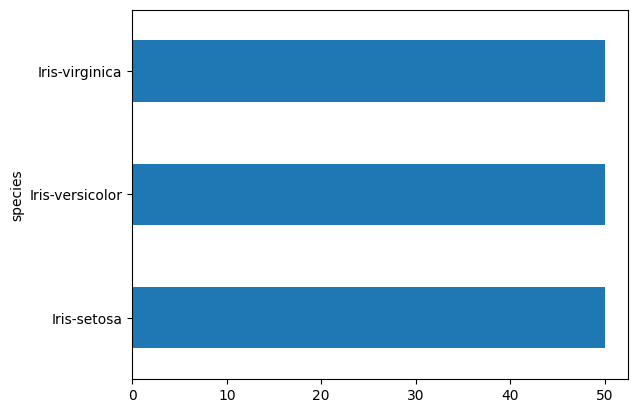

In [ ]:
# Do not change this cell
idata.groupby('species').size().plot(kind='barh')

Now we need a distance function. In KNN we find the distance between the test data with
all our dataset.

**General Distance Function in KNN :**

The general distance function used in K-Nearest Neighbors (KNN) is the Minkowski Distance, which generalizes both Euclidean and Manhattan distances.

**Minkowski Distance Formula:**
$$
d(a, b) = \left( \sum_{i=1}^{n} |a_i - b_i|^p \right)^{\frac{1}{p}}
$$

---

**Special Cases of Minkowski Distance:**

**Manhattan Distance (L1 norm)**
$$
d(a, b) = \sum_{i=1}^{n} |a_i - b_i|
$$

**Euclidean Distance (L2 norm):**
$$
d(a, b) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}
$$


Write  a function that calculates the p-norm distance between two lists, a and b, with a default value of $p=1$:

In [ ]:
import numpy as np

def dis(a, b, p=1):
    d = np.sum(np.abs(np.array(a) - np.array(b))**p) ** (1/p)
    return d


Now one test point will be executed, it’s to check all
implementation that have been so far.

The test point that used is ``test-pt = [4.8, 2.7, 2.5,
0.7]``.

Here after taking the test point, write a code to measure distance between test_pt and   
all other 150 data points. Then convert the list of distances to a python DataFrame for further
convenience.

In [ ]:
test_pt = [4.8, 2.7, 2.5, 0.7]
import numpy as np
import pandas as pd
from sklearn import datasets

def dis(a, b, p=1):
    return np.sum(np.abs(np.array(a) - np.array(b))**p) ** (1/p)

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

test_pt = [4.8, 2.7, 2.5, 0.7]

dists = pd.DataFrame({
    'distance': np.linalg.norm(df.iloc[:, :-1].values - np.array(test_pt), axis=1),
    'target': df['target']
})

dists.head()

,distance,target
0,1.479865,0
1,1.249000,0
2,1.396424,0
3,1.204159,0
4,1.519868,0


Distance DataFrame is sorted to see which class the nearest.

In [ ]:
def knn_sort(k,dists):
    return dists.sort_values(by = 'dist')[:k]

Here, $k=5$.
After sorting the distances and selecting the top k nearest neighbors, the most common class label among them is determined by counting occurrences.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from collections import Counter

test_pt = [4.8, 2.7, 2.5, 0.7]

iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

def p_norm_distance(a, b, p=1):
    return sum(abs(x - y) ** p for x, y in zip(a, b)) ** (1 / p)

df['dist'] = [p_norm_distance(test_pt, row) for row in data]

def knn_sort(k, dists):
    return dists.sort_values(by='dist')[:k]

k = 5
dists = knn_sort(k, df)
dists.head()
dists.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dist
98,5.1,2.5,3.0,1.1,1,1.4
57,4.9,2.4,3.3,1.0,1,1.5
93,5.0,2.3,3.3,1.0,1,1.7
24,4.8,3.4,1.9,0.2,0,1.8
45,4.8,3.0,1.4,0.3,0,1.8


Now determine the accurate prediction for that data point.

**Your Answer:** The accurate prediction for the test point [4.8, 2.7, 2.5, 0.7] is the class label returned by that line — typically it will be 1 (Iris Versicolor), depending on the distance metric and data.

In the next step, we use all the data points.

In machine learning, train-test split is the process of dividing a dataset into two parts:

- Training Set – Used to train the model.
- Test Set – Used to evaluate the model’s performance on unseen data.
This ensures that the model generalizes well and does not just memorize the training data.

---

First split the data into train and test datasets.
- 75% train, 25% test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

idata = pd.read_csv('./IRIS.csv')
idata.head()

if idata['species'].dtype == 'object':
    idata['target'] = idata['species'].astype('category').cat.codes
else:
    idata['target'] = idata['species']

features = idata.columns[:4]
X = idata[features].values
y = idata['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Implements the K-Nearest Neighbors (KNN) algorithm using a custom distance function.

Fill  the missing parts in the given code.

In [ ]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in range(len(X_train)):
            a = dis(test_pt, X_train[i], p)
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=range(len(y_train)), columns=['dist'])
        sorted_dists = dists.sort_values(by='dist').head(k)

        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1

        y_predict.append(max(count_set, key=count_set.get))

    accr = sum([yp == yt for yp, yt in zip(y_predict, y_test)]) / len(y_test)
    return accr


In [ ]:
KNN(X_train, X_test, y_train, y_test, 5,1)

np.float64(1.0)

In KNN, we can change k for getting better accuracy. See how the model accuracy varies with respect to k value. A
simple loop should be used to call KNN few times:

1.0


Text(0, 0.5, 'Accuracy (%)')

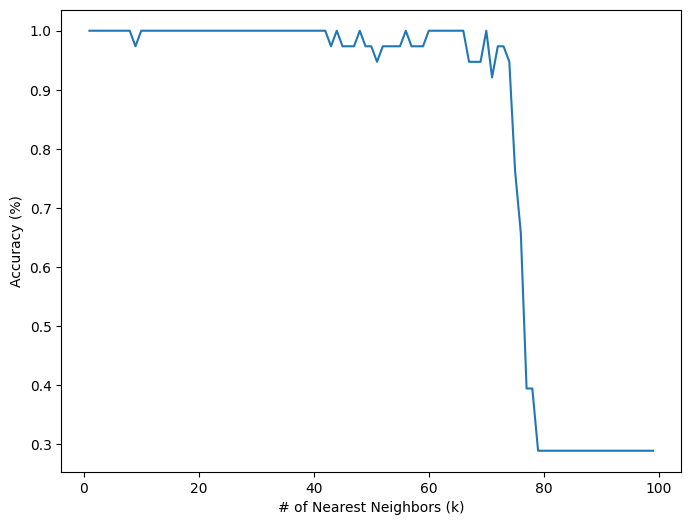

In [ ]:
accuracies = []
for i in range(1,100):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

What is the best value of k?

**Your Answer:**

# Problem 4
In this Problem, you will implement and analyze 2D geometric transformations using transformation matrices. You will write Python functions to perform transformations on 2D points, apply them to different shapes, and visualize the results. Additionally, you will explore the effects of combining multiple transformations.
## 4-1 Implementing Geometric Transformations
### part 1: Transformation Functions
Implement the following 2D geometric transformations using homogeneous transformation matrices. Each function should take a point (or a set of points) and transformation parameters as input and return the transformed point(s).

- **Translation:** Shift points by a given $t_x$ and $t_y$
- **Rotation:** Rotate points around the origin by an angle $\theta$ (in degrees)
- **Scaling:** Scale points by given factors $s_x$ and $s_y$
- **Shearing:** Apply shearing along the x-axis ($sh_x$) and y-axis ($sh_y$)


In [ ]:
import numpy as np

def translation_matrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1]
    ])

def rotation_matrix(theta):
    rad = np.radians(theta)
    return np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad),  np.cos(rad), 0],
        [0, 0, 1]
    ])

def scaling_matrix(sx, sy):
    return np.array([
        [sx, 0,  0],
        [0, sy,  0],
        [0, 0,   1]
    ])

def shearing_matrix(shx, shy):
    return np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0,  0, 1]
    ])

def apply_transformation(points, matrix):
    hom_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed = matrix @ hom_points.T
    return transformed[:2].T


### part 2: Composite Transformations
Implement a function that applies a sequence of transformations to a point or a shape.
- Allow the user to specify multiple transformations in a sequence (e.g., rotate → scale → translate).

In [ ]:
def apply_composite_transform(points, transformations):
    composite_matrix = np.eye(3)

    for transform in transformations:
        name, *params = transform
        if name == "translate":
            composite_matrix = translation_matrix(*params) @ composite_matrix
        elif name == "rotate":
            composite_matrix = rotation_matrix(*params) @ composite_matrix
        elif name == "scale":
            composite_matrix = scaling_matrix(*params) @ composite_matrix
        elif name == "shear":
            composite_matrix = shearing_matrix(*params) @ composite_matrix
        else:
            raise ValueError(f"Unknown transformation: {name}")

    return apply_transformation(points, composite_matrix)

## 4-2 Visualization
### part 1: Transforming Basic Shapes
- Create three different shapes (for example a triangle, a square, and a pentagon).
- Apply each transformation (translation, rotation, scaling, shearing) to these shapes.
- Plot the original shape and its transformed versions in the same figure, using different colors and appropriate labels.

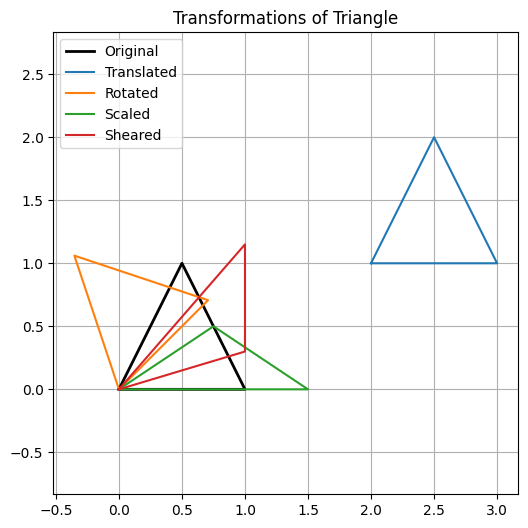

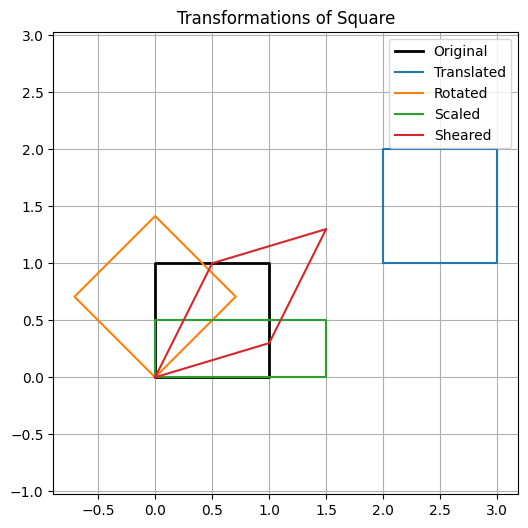

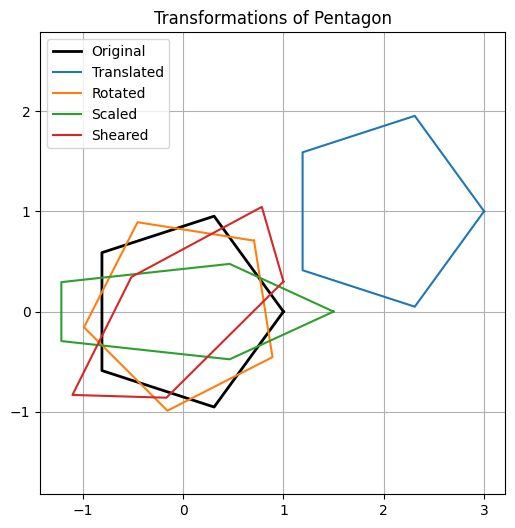

In [ ]:
def create_triangle():
    return np.array([[0, 0], [1, 0], [0.5, 1]])

def create_square():
    return np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

def create_pentagon():
    angle = np.linspace(0, 2 * np.pi, 6)[:-1]
    return np.stack((np.cos(angle), np.sin(angle)), axis=1)

def plot_shape(ax, shape, label, color):
    shape_closed = np.vstack((shape, shape[0]))
    ax.plot(shape_closed[:, 0], shape_closed[:, 1], label=label, color=color)

def plot_shapes(original, transformed, title, labels):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    original_closed = np.vstack([original, original[0]])
    plt.plot(original_closed[:, 0], original_closed[:, 1], label=labels[0], color='black', linewidth=2)
    for shape, label in zip(transformed, labels[1:]):
        shape_closed = np.vstack([shape, shape[0]])
        plt.plot(shape_closed[:, 0], shape_closed[:, 1], label=label)
    plt.legend()
    plt.show()

def visualize_transformations():
    shapes = {
        "Triangle": create_triangle(),
        "Square": create_square(),
        "Pentagon": create_pentagon()
    }
    transformations = [
        ("translate", 2, 1),
        ("rotate", 45),
        ("scale", 1.5, 0.5),
        ("shear", 0.5, 0.3)
    ]
    for name, shape in shapes.items():
        transformed_shapes = [apply_composite_transform(shape, [t]) for t in transformations]
        labels = ["Original", "Translated", "Rotated", "Scaled", "Sheared"]
        plot_shapes(shape, transformed_shapes, f"Transformations of {name}", labels)
visualize_transformations()

### part 2: Composite Transformation Visualization
- Choose one shape and apply two different sequences of transformations to it.
- Plot the results in a side-by-side comparison.
- Provide a short written explanation (1-2 sentences) of how the order of transformations affects the outcome.

Answer : The order of transformations changes the final result.
When you rotate first, the translation moves the object along the rotated axes.
When you translate first, the rotation spins the entire shifted shape around the origin, producing a very different final position.

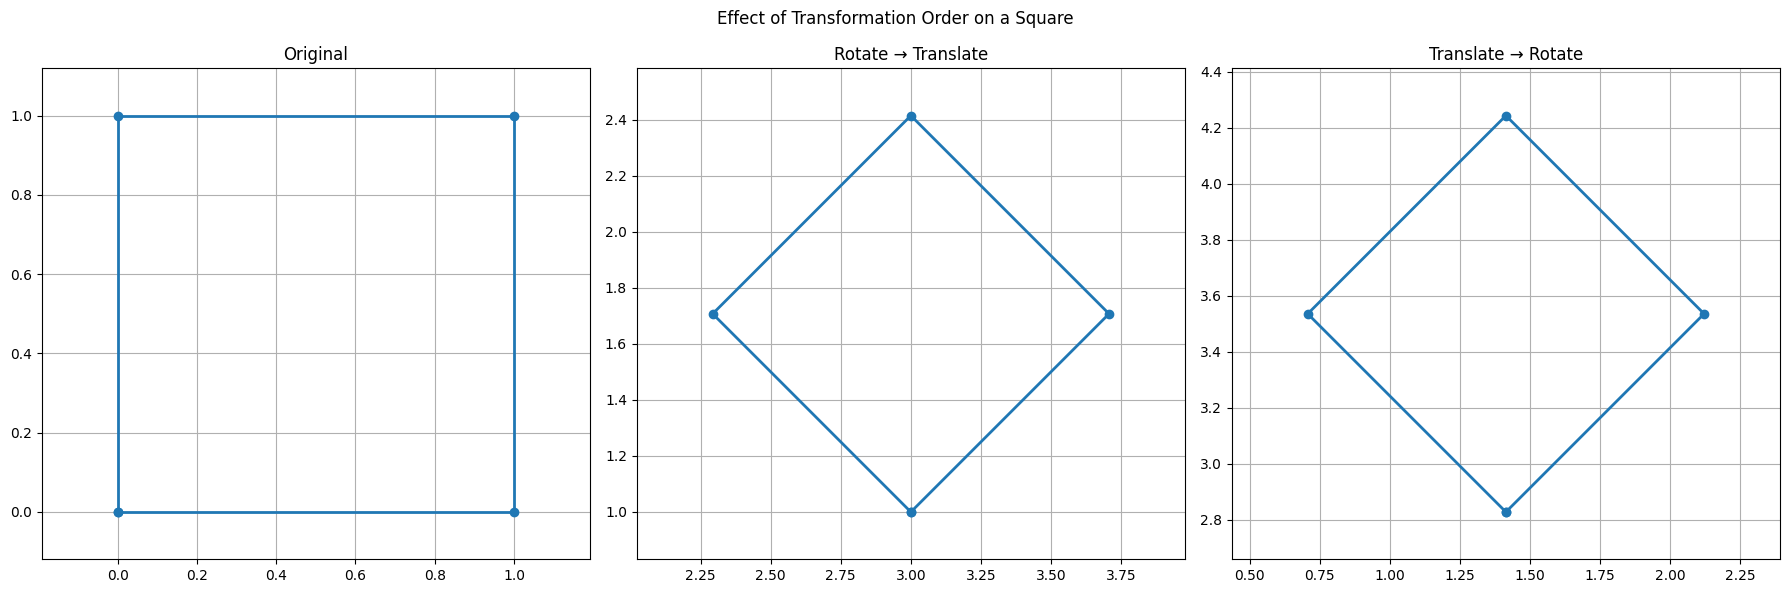

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_composite_order_effect():
    shape = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1]
    ])

    sequence1 = [("rotate", 45), ("translate", 3, 1)]
    sequence2 = [("translate", 3, 1), ("rotate", 45)]

    transformed1 = apply_composite_transform(shape, sequence1)
    transformed2 = apply_composite_transform(shape, sequence2)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for ax, s, title in zip(
        axs,
        [shape, transformed1, transformed2],
        ["Original", "Rotate → Translate", "Translate → Rotate"]
    ):
        shape_closed = np.vstack([s, s[0]])
        ax.plot(shape_closed[:, 0], shape_closed[:, 1], marker='o', linewidth=2)
        ax.set_title(title)
        ax.axis('equal')
        ax.grid(True)

    plt.suptitle("Effect of Transformation Order on a Square")
    plt.tight_layout()
    plt.show()
visualize_composite_order_effect()

## 4-3 Reflection (Bonus)
- Implement reflection transformations (across the x-axis, y-axis, and an y=x line).
- Visualize the effect of reflections on one of your shapes.

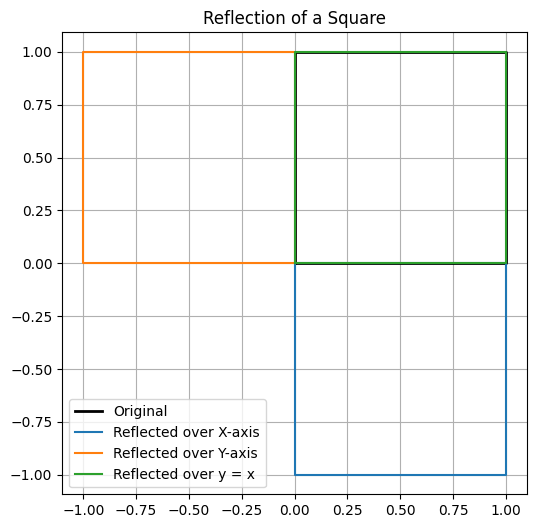

In [ ]:
def reflection_x():
    return np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ])

def reflection_y():
    return np.array([
        [-1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

def reflection_y_eq_x():
    return np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])
def visualize_reflections():
    shape = create_square()

    reflected_x = apply_transformation(shape, reflection_x())
    reflected_y = apply_transformation(shape, reflection_y())
    reflected_diag = apply_transformation(shape, reflection_y_eq_x())

    transformed_shapes = [reflected_x, reflected_y, reflected_diag]
    labels = ["Original", "Reflected over X-axis", "Reflected over Y-axis", "Reflected over y = x"]

    plot_shapes(shape, transformed_shapes, "Reflection of a Square", labels)
visualize_reflections()
